In [2]:
# Librería para el manejo de datos
import pandas as pd

# Librería para conexión a base de datos
import mysql.connector

# Librerías para Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


La información de los datos se encuentra almacenada en la base de datos.

In [2]:
# Conexión con la base de datos
cnx = mysql.connector.connect(host='localhost',
                              port = '3306',
                              database='corpus_linguistico',
                              user='root',
                              password='1234')

In [3]:
# Instancia de cursor
cursor = cnx.cursor()

In [4]:
# Consulta para obtener los datos de la tabla
query = ("SELECT * FROM TU" )

In [5]:
# Ejecución de la consulta
cursor.execute(query)

In [6]:
# Obtención de los datos
data = cursor.fetchall()

In [7]:
# Cierre de la conexión
cursor.close()

True

In [8]:
# Conversión de los datos a un DataFrame
df = pd.DataFrame(data, columns=['id', 'source', 'target', 'file_name', 'quantity_words_source', 'quantity_words_target',
                                 'sentiment', 'NOUN_source', 'NOUN_target', 'ADJ_source', 'ADJ_target', 'DET_source', 'DET_target',
                                 'ADV_source', 'ADV_target', 'CCONJ_source', 'CCONJ_target', 'VERB_source', 'VERB_target',
                                 'VAUX_source', 'VAUX_target', 'PRON_source', 'PRON_target', 'ADP_source', 'ADP_target', 
                                 'PUNCT_source' , 'PUNCT_target', 'busy'])

In [9]:
df.head()

,id,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,...,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target,busy
0,1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,...,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,0
1,2,! - - - - - - Contest Announcement!! - - - - -...,¡! - - - - - ¡Concurso!! ¡- - - - - !,q_en_en-es_d,16,13,neutral,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0,0
2,3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,0
3,4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0,0
4,5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0,0


In [10]:
# Dejar la columna id como índice
df = df.set_index('id', inplace=False)

## Set de datos

In [11]:
df.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target,busy
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,0
2,! - - - - - - Contest Announcement!! - - - - -...,¡! - - - - - ¡Concurso!! ¡- - - - - !,q_en_en-es_d,16,13,neutral,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0,0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0,0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0,0


**Cada registro contiene 27 características. Las columnas son:**

1. "source":  frases en inglés
2. "target":  frases en español
3. "file_name":  nombre del archivo
4. "quantity_words_source":  cantidad de palabras en inglés
5. "quantity_words_target":  cantidad de palabras en español
6. "sentiment":  sentimiento de la frase
7. "NOUN_source":  cantidad de sustantivos en inglés
8. "NOUN_target":  cantidad de sustantivos en español
9. "ADJ_source":  cantidad de adjetivos en inglés
10. "ADJ_target":  cantidad de adjetivos en español
11. "DET_source":  cantidad de determinantes en inglés
12. "DET_target":  cantidad de determinantes en español
13. "ADV_source":  cantidad de adverbios en inglés
14. "ADV_target":  cantidad de adverbios en español
15. "CCONJ_source":  cantidad de conjunciones en inglés
16. "CCONJ_target":  cantidad de conjunciones en español
17. "VERB_source":  cantidad de verbos en inglés
18. "VERB_target":  cantidad de verbos en español
19. "VAUX_source":  cantidad de verbos auxiliares en inglés
20. "VAUX_target":  cantidad de verbos auxiliares en español
21. "PRON_source":  cantidad de pronombres en inglés
22. "PRON_target":  cantidad de pronombres en español
23. "ADP_source":  cantidad de preposiciones en inglés
24. "ADP_target":  cantidad de preposiciones en español
25. "PUNCT_source":  cantidad de signos de puntuación en inglés
26. "PUNCT_target":  cantidad de signos de puntuación en español
27. "busy":  si la frase es ocupada o no (1: ocupada, 0: no ocupada). Esto se utilizo para guardar los datos en la base de datos


In [12]:
# Cantidad de registros
print(f"Cantidad de registros del dataset: {df.shape[0]}")

Cantidad de registros del dataset: 16850800


In [13]:
# Guardar el dataset en un archivo csv para utilizarlo en la visualización de datos en Streamlit
df.to_csv('../Ficheros/csv/df_colums.csv', sep='\t')

## Observación general del dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16850800 entries, 1 to 16850800
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   source                 object 
 1   target                 object 
 2   file_name              object 
 3   quantity_words_source  int64  
 4   quantity_words_target  int64  
 5   sentiment              object 
 6   NOUN_source            float64
 7   NOUN_target            float64
 8   ADJ_source             float64
 9   ADJ_target             float64
 10  DET_source             float64
 11  DET_target             float64
 12  ADV_source             float64
 13  ADV_target             float64
 14  CCONJ_source           float64
 15  CCONJ_target           float64
 16  VERB_source            float64
 17  VERB_target            float64
 18  VAUX_source            float64
 19  VAUX_target            float64
 20  PRON_source            float64
 21  PRON_target            float64
 22  ADP_source      

*Observaciones:*
1. Hay 4 variables categóricas: source, target, file_name y sentiment (type object).
2. Las demás variables son de tipo numérico.
3. Hay un total de 16 850 800 observaciones.
4. Hay 27 variables.

### Datos Faltantes

In [14]:
# Cantidad de registros por variables
df.count()

source                   16850800
target                   16850800
file_name                16850800
quantity_words_source    16850800
quantity_words_target    16850800
sentiment                12042000
NOUN_source              12042000
NOUN_target              12042000
ADJ_source               12042000
ADJ_target               12042000
DET_source               12042000
DET_target               12042000
ADV_source               12042000
ADV_target               12042000
CCONJ_source             12042000
CCONJ_target             12042000
VERB_source              12042000
VERB_target              12042000
VAUX_source              12042000
VAUX_target              12042000
PRON_source              12042000
PRON_target              12042000
ADP_source               12042000
ADP_target               12042000
PUNCT_source             12042000
PUNCT_target             12042000
busy                     16850800
dtype: int64

In [15]:
# Datos nulos por columnas
df.isnull().sum()

source                         0
target                         0
file_name                      0
quantity_words_source          0
quantity_words_target          0
sentiment                4808800
NOUN_source              4808800
NOUN_target              4808800
ADJ_source               4808800
ADJ_target               4808800
DET_source               4808800
DET_target               4808800
ADV_source               4808800
ADV_target               4808800
CCONJ_source             4808800
CCONJ_target             4808800
VERB_source              4808800
VERB_target              4808800
VAUX_source              4808800
VAUX_target              4808800
PRON_source              4808800
PRON_target              4808800
ADP_source               4808800
ADP_target               4808800
PUNCT_source             4808800
PUNCT_target             4808800
busy                           0
dtype: int64

**Observaciones:**
1. Hay datos nulos en algunas variables (no se pudo lograr cargar todas las categorías gramaticales).<br>
   Las variables correspondientes a las categorías gramaticales y el sentimiento de cada frase tienen un total de 4 808 800 filas con datos nulos. 
2. Hay datos faltantes, ya que todas las columnas no tienen la misma cantidad de observaciones.

### Filas Repetidas o con valores nulos

- El dataset no tiene valores en el source repetidos ya que se eliminaron los duplicados antes de guardarlos en la base de datos y procesar todas las variables.
- El dataset tiene filas con valores nulos, ya que no se logró guardar en la base de datos todos los valores de las categorías gramaticales y sentimiento de todas las frases del dataset.
- Se procede a eliminar las filas con valores nulos ya que se cuenta con un número considerado de muestras.

In [16]:
# Eliminar registros con datos nulos
df = df.dropna()

In [17]:
df.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target,busy
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,0
2,! - - - - - - Contest Announcement!! - - - - -...,¡! - - - - - ¡Concurso!! ¡- - - - - !,q_en_en-es_d,16,13,neutral,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0,0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0,0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0,0


In [18]:
df.shape

(12042000, 27)

In [19]:
df.count()

source                   12042000
target                   12042000
file_name                12042000
quantity_words_source    12042000
quantity_words_target    12042000
sentiment                12042000
NOUN_source              12042000
NOUN_target              12042000
ADJ_source               12042000
ADJ_target               12042000
DET_source               12042000
DET_target               12042000
ADV_source               12042000
ADV_target               12042000
CCONJ_source             12042000
CCONJ_target             12042000
VERB_source              12042000
VERB_target              12042000
VAUX_source              12042000
VAUX_target              12042000
PRON_source              12042000
PRON_target              12042000
ADP_source               12042000
ADP_target               12042000
PUNCT_source             12042000
PUNCT_target             12042000
busy                     12042000
dtype: int64

In [21]:
# Guardar el dataset en un archivo csv para utilizarlo en la visualización de datos en Streamlit
df.to_csv('../Ficheros/csv/df_row_clean.csv', sep='\t')

### Columnas irrelevantes

- Para identificar si existen columnas irrelevantes para el análisis se realiza un conteo de los valores únicos por columna.
- Si la cantidad de valores únicos es igual a la cantidad de registros, se puede considerar que la columna no aporta información relevante.
- No se considera la columna source y target ya que son los textos en inglés y español respectivamente, del cual se obtuvieron los datos. 

In [20]:
# Columnas categóricas
columns_categorical = ['file_name', 'sentiment', 'busy']

# Conteo de niveles por categoría
for column in columns_categorical:
    print(f'Columna {column}: {df[column].nunique()} niveles')

Columna file_name: 15 niveles
Columna sentiment: 3 niveles
Columna busy: 2 niveles


In [21]:
# Niveles de la variable sentimiento
df['sentiment'].unique()

array(['positivo', 'neutral', 'negativo'], dtype=object)

In [22]:
# Niveles de la variable file_name
df['file_name'].unique()

array(['q_en_en-es_d', 'eng_newscrawl-public_2018_en-es_d',
       'quora_en_4_en-es_d', 'quora_en_2M_en-es_d_total',
       'social_it_en-es_it_d', 'en_datafiniti_reviews_text_en-es',
       'en_youtube_en-es', 'en_ecomm_rev_en-es', 'twitter_en-es_d',
       'en_ecomquestions_en-es', 'quora_en_2_en-es_d', 'quora_en_en-es',
       'en_dialog_en-es', 'en_movie_rev_en-es', 'eng_news_2020_en-es_d'],
      dtype=object)

In [23]:
# Niveles de la variable busy
df['busy'].unique()

array([0, 1])

In [24]:
# Eliminar la columna busy ya que no aporta información (sólo se utilizó para identificar las frases que se iban etiquetando en el corpus)
df = df.drop(columns=['busy'])

In [25]:
# Mostrar columnas del dataset
df.columns

Index(['source', 'target', 'file_name', 'quantity_words_source',
       'quantity_words_target', 'sentiment', 'NOUN_source', 'NOUN_target',
       'ADJ_source', 'ADJ_target', 'DET_source', 'DET_target', 'ADV_source',
       'ADV_target', 'CCONJ_source', 'CCONJ_target', 'VERB_source',
       'VERB_target', 'VAUX_source', 'VAUX_target', 'PRON_source',
       'PRON_target', 'ADP_source', 'ADP_target', 'PUNCT_source',
       'PUNCT_target'],
      dtype='object')

In [26]:
df.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0
2,! - - - - - - Contest Announcement!! - - - - -...,¡! - - - - - ¡Concurso!! ¡- - - - - !,q_en_en-es_d,16,13,neutral,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0


In [28]:
# Variables numéricas
# Estadísticas descriptivas
df.describe()

,quantity_words_source,quantity_words_target,NOUN_source,NOUN_target,ADJ_source,ADJ_target,DET_source,DET_target,ADV_source,ADV_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
count,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,...,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07,1.204200e+07
mean,1.545068e+01,1.609821e+01,3.004585e+00,3.155443e+00,1.277594e+00,1.218486e+00,1.418912e+00,2.225105e+00,9.258562e-01,1.032968e+00,...,2.026512e+00,1.853249e+00,1.113877e+00,8.483391e-01,1.726114e+00,1.044405e+00,1.558615e+00,2.312506e+00,2.095402e+00,2.200281e+00
std,9.616360e+00,1.038602e+01,2.455432e+00,2.559911e+00,1.364959e+00,1.329193e+00,1.395452e+00,1.908898e+00,1.138700e+00,1.179633e+00,...,1.654672e+00,1.575851e+00,1.118882e+00,9.588394e-01,1.651519e+00,1.278904e+00,1.549323e+00,2.139013e+00,1.912527e+00,2.024424e+00
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.400000e+01,1.400000e+01,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,2.000000e+01,2.100000e+01,4.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,...,3.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
max,8.310000e+02,8.000000e+02,1.470000e+02,1.430000e+02,6.300000e+01,6.100000e+01,8.300000e+01,1.090000e+02,6.600000e+01,3.490000e+02,...,1.200000e+02,1.050000e+02,7.600000e+01,4.500000e+01,1.280000e+02,5.800000e+01,8.100000e+01,9.700000e+01,8.830000e+02,8.830000e+02


**Observaciones**
- Las variables categóricas tienen más de 2 niveles, por lo que sirven para el análisis de datos.
- Todas las columnas numéricas tienen una desviación estándar diferente de 0, lo que indica que no tienen un único valor.
- La variable busy tiene 2 niveles ('ocupado o no'). Se creó para identificar si el registro había sido guardado en la base de datos. Por lo que se eliminó del análisis.
- De las variables numéricas por ahora no se va a eliminar ninguna.

In [30]:
# Guardar el dataset en un archivo csv sin la columna "busy" y sin los registros con datos nulos para utilizarlo en la limpieza de outliers
df.to_csv('../Ficheros/csv/df_colum_clean.csv', sep='\t')

### Outliers en variables numéricas

En el notebook [outliers_var_numerics](5_outliers_var_numerics.ipynb)  se muestra el tratamiento de los outliers en las variables numéricas del dataset TU.

In [3]:
# Lectura de los datos del csv resultante
df = pd.read_csv('../Ficheros/csv/df_sin_outliers.csv', sep='\t', index_col='id')

In [4]:
df.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0
6,!!! You became its next victim when you entere...,¡¡¡!!! Te convertiste en su próxima víctima cu...,q_en_en-es_d,19,19,negativo,3.0,3.0,2.0,2.0,...,3.0,3.0,1.0,0.0,5.0,4.0,0.0,2.0,4.0,7.0


In [5]:
df.shape

(10068314, 26)

### Errores tipográficos en variables categóricas

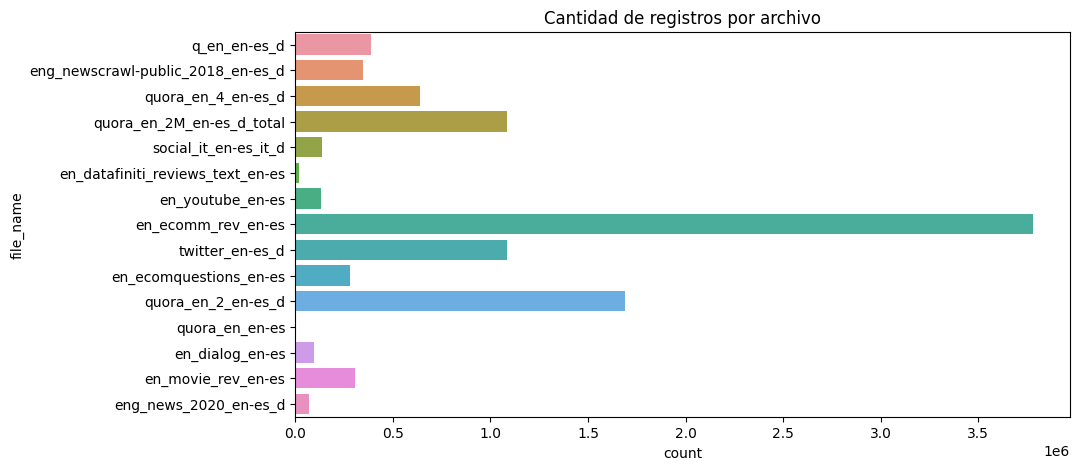

In [6]:
# Gráfico  de barras para la variable file_name
plt.figure(figsize=(10, 5))
sns.countplot(y='file_name', data=df)
plt.title('Cantidad de registros por archivo')
plt.show()

In [7]:
df['file_name'].unique()

array(['q_en_en-es_d', 'eng_newscrawl-public_2018_en-es_d',
       'quora_en_4_en-es_d', 'quora_en_2M_en-es_d_total',
       'social_it_en-es_it_d', 'en_datafiniti_reviews_text_en-es',
       'en_youtube_en-es', 'en_ecomm_rev_en-es', 'twitter_en-es_d',
       'en_ecomquestions_en-es', 'quora_en_2_en-es_d', 'quora_en_en-es',
       'en_dialog_en-es', 'en_movie_rev_en-es', 'eng_news_2020_en-es_d'],
      dtype=object)

In [8]:
# Unifica registros que significan lo mismo: q_en_en-es_d, quora_en_4_en-es_d, quora_en_2M_en-es_d_total, quora_en_2_en-es_d
df['file_name'] = df['file_name'].replace([
                                            'q_en_en-es_d', 'quora_en_4_en-es_d',
                                             'quora_en_2M_en-es_d_total', 'quora_en_2_en-es_d', 'quora_en_en-es'], 
                                        'quora_en_es')


In [9]:
df['file_name'] = df['file_name'].replace(['en_ecomm_rev_en-es', 'en_ecomquestions_en-es'], 
                                          'ecomm_en_es')


In [10]:
df['file_name'] = df['file_name'].replace(['eng_newscrawl-public_2018_en-es_d', 'eng_news_2020_en-es_d'], 
                                          'eng_newscrawl_en_es')

In [11]:
# Cambia nombre
df['file_name'] = df['file_name'].replace('social_it_en-es_it_d', 'social_it_en_es')
df['file_name'] = df['file_name'].replace('twitter_en-es_d-es_it_d', 'twitter_en_es')
df['file_name'] = df['file_name'].replace('en_youtube_en-es', 'youtube_en_es') 
df['file_name'] = df['file_name'].replace('en_datafiniti_reviews_text_en-es', 'datafiniti_reviews_text_en_es')
df['file_name'] = df['file_name'].replace('en_dialog_en-es', 'dialog_en_es')
df['file_name'] = df['file_name'].replace('en_movie_rev_en-es', 'movie_rev_en_es')

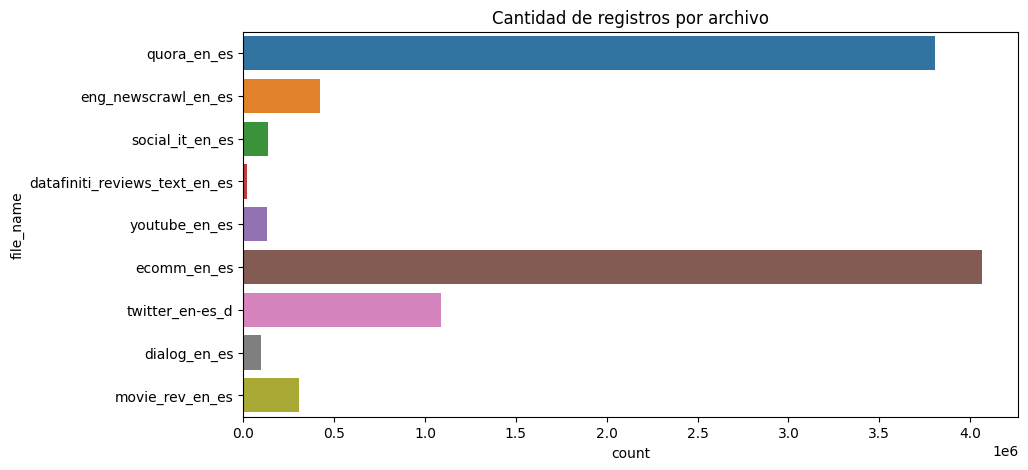

In [12]:
# Gráfico  de barras para la variable file_name con los nuevos niveles
plt.figure(figsize=(10, 5))
sns.countplot(y='file_name', data=df)
plt.title('Cantidad de registros por archivo')
plt.show()

In [14]:
# Almacena en un csv el dataset resultante para su posterior uso
df.to_csv('../Ficheros/csv/df_corpus_linguistico.csv', sep='\t')

### Resumen

- El datset ya está listo para el análisis exploratorio de datos.
- Fichero original: 19 511 591 observaciones.
- Resultado de eliminar sources repetidos: 16 850 800 observaciones.
- Resultado de eliminar filas con valores nulos: 12 042 000 observaciones.
- Resultado de eliminar outliers: 10 068 314 observaciones.

[EDA](6_EDA.ipynb)